In [1]:
# load data
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import sys
import numpy as np
import matplotlib
import matplotlib
import matplotlib.lines as mlines

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
import matplotlib as mpl

mpl.style.use('classic')
mpl.rcParams['errorbar.capsize'] = 3
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 28})
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm

In [2]:
def rotate_via_numpy(x, y, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    #print (x)
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])
    #print (m.T[:,0])
    #print (m)
    return np.array(m.T[:,0]), np.array(m.T[:,1])

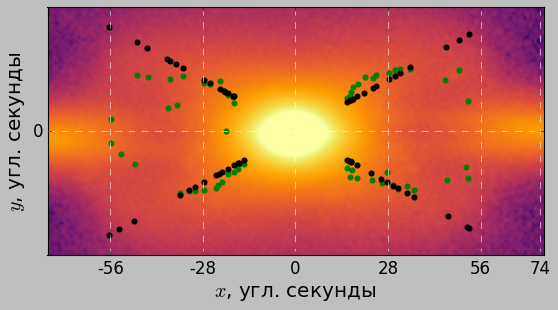

In [6]:
my_cmap = copy.copy(matplotlib.cm.get_cmap('inferno'))  # copy the default cmap
my_cmap.set_bad((0, 0, 0))
matplotlib.rcParams.update({'font.size': 18})
#vmin = 10 ** (-3)
#vmax = 3.0
image_file = "image_minus_modeldisc_mb_eon183.fits" #"x_only.fits"

image_data = fits.getdata(image_file, ext=0)
cut_x_left = 70
cut_x_right = 380
cut_y_bottom = 20
cut_y_up = 180 
plt.figure()
#plt.imshow(image_data[cut_y_bottom:cut_y_up, cut_x_left:cut_x_right], cmap=my_cmap, vmin=vmin, vmax=vmax, origin="lower", norm=LogNorm())
plt.imshow(image_data[:, cut_x_left:cut_x_right], 
           cmap=my_cmap, origin="lower", norm=LogNorm(vmin=0.003, vmax=3))

plt.grid(color='w', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
dir_list = ["mass_b_eon183"] #["e04", "e06"]#, "e08"]
ell = [0.3] #[0.4, 0.6]#, 0.8]
axis_ratio = np.ones(len(ell)) - ell

signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
colors = ['g', 'b', 'purple']
x0 = 228.4487  - cut_x_left
y0 = 99.2844 #- cut_y_bottom
k_ideal = 0.581458 
ang = 1
j = 1
for j in range(0,1):
    dir = dir_list[j]
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    
    data_angles[:, 1:] = np.tan(data_angles[:, 1:]*np.pi/180)
    #print (data_angles)
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j]**2)
        y = data_angles[:,i]*x
        if j == 0:
            x_ideal = np.copy(x)
            y_ideal = x_ideal*k_ideal
        
        #print (axis_ratio[j],np.shape(x_ideal), np.shape(y_ideal))
        #print (np.shape(x_ideal), np.shape(y_ideal))
        x, y = rotate_via_numpy(x, y, np.pi/180.0*ang)
        if j == 0:
            x_ideal, y_ideal = rotate_via_numpy(x_ideal, y_ideal, np.pi/180.0*ang)
            x_ideal = x0 + signs_xy[i-1][0]*x_ideal
            y_ideal = y0 + signs_xy[i-1][1]*y_ideal
            
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y    
        plt.scatter(x, y, color=colors[j])
        if j == 0:
            plt.scatter(x_ideal, y_ideal, color="k")
    j += 1

plt.plot()
desired_ticks = [-84, -56,-28, 0, 28, 56,74]
desired_ticks_labels = list(map(str, desired_ticks))
x_ticks = (x0+np.array(desired_ticks)/0.75)

desired_ticks_y = [-56, 0, 56]
desired_ticks_labels_y = list(map(str, desired_ticks_y))
y_ticks = (y0+np.array(desired_ticks_y)/0.75)
plt.xticks(np.array(x_ticks), desired_ticks_labels)
plt.yticks(np.array(y_ticks), desired_ticks_labels_y)
plt.xlabel("$x$, угл. секунды")#, fontsize=14)
plt.ylabel("$y$, угл. секунды")#, fontsize=14)
plt.gca().set_aspect("equal")
plt.xlim([-100+x0, 100+x0])
plt.ylim([-50+y0, 50+y0])
plt.savefig("Comp_with_Sav_mb_eon183.jpg",
                transparent = False, dpi=300, bbox_inches='tight', pad_inches=0.05)

[[28.2   33.285  0.92  33.756 29.139 24.275 13.603]
 [30.    33.377 25.651 31.116 36.94  31.771  4.098]
 [32.1   36.354 29.838 34.039 35.839 34.018  2.561]
 [34.4   38.328 29.351 34.343 41.097 35.78   4.42 ]
 [37.1   38.031 30.14  33.777 38.504 35.113  3.411]
 [42.1   39.01  34.469 35.668 34.03  35.794  1.951]
 [44.1   35.441 30.056 35.775 25.127 31.6    4.373]
 [46.2   35.707 28.599 36.598 32.253 33.289  3.157]
 [50.5   32.805 13.458 33.911 29.922 27.524  8.251]
 [53.5   32.343 11.403 31.683 30.464 26.474  8.727]
 [55.5   31.553 26.937 30.69  27.407 29.147  2.005]
 [58.9   29.434 23.376 29.245 27.314 27.342  2.435]
 [67.6   19.904 21.034 12.544 18.846 18.082  3.29 ]
 [71.9   10.821 20.563  8.459 12.812 13.163  4.541]
 [74.9   21.363  4.831  4.829 16.221 11.811  7.213]]


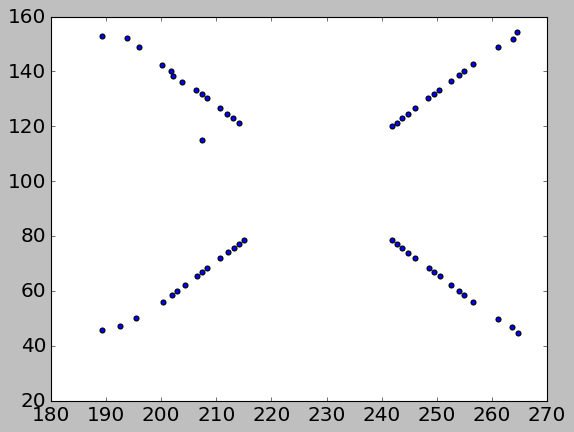

In [4]:
dir_list = ["mass_b_eon183"] #["e04", "e06", "e08"]
ell = [0.3] #[0.4, 0.6, 0.8]
axis_ratio = np.ones(len(ell)) - ell
j = 0
signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
x0 = 228.4487
y0 = 99.2844
for dir in dir_list:
    
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    print (data_angles)
    data_angles[:, 1:] = np.arctan(data_angles[:, 1:])
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j])
        y = data_angles[:,i]*x
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y
        plt.scatter(x, y)
    j += 1

In [13]:
plt.savefig(sys.argv[2] + "_model.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>